# Perceptron 

Perceptron was one of the first simplified models of a biological neuron.

![Perceptron](./neuron.png)


In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $x$ (a real-valued vector) to an output value $f(x)$ (a single binary value):

Assume we have data points with labels $y \in \{0,1\}$ and want to do binary classification.

$$f(x) = \begin{cases} 1 & \text{if} \: w^T * x + b > 0\\ 0 & \text{otherwise}\end{cases}$$

## Idea: Find a Separating Hyperplane

### Linear Model

$$ h(x) = w^T * x + b$$

### Step-wise Activation Function

$$g(z) = \begin{cases} 1 & \text{if} \: z > 0\\ 0 & \text{otherwise}\end{cases}$$

### Prediction

Prediction is made by executing the model and than use the activation function. If the model outputs value > 0 then activation is made:

$$\hat{y} = g(h(x)) = g( w^T * x + b)$$

Because the activation function is not  continuous differentiable in 0 we cant use Gradient Descent. But their is a simple update-function:

$$ w := w + \Delta w$$

$$ \Delta w := \alpha * (y - \hat{y})*x $$

$\alpha$ learning rate with $\alpha$ in $[0,1]$.

## Update Rule


 |y|y_predict|output|what|
 |:-|:-|:-|:-|
 |1| 1 |0||
 |1| 0 |1|weights too low|
 |0| 1 |-1|weights too high| 
 |0| 0 |0||

## Exercise 

Implement Perceptron with numpy from scratch

1. Split the data into test and train data
2. Define Model
3. No explicit Loss function necessary, but activation rule
4. Initialize weight at zero
5. Train 20 Epochs using update function
6. Compute accurance with your test data

In [1]:
################ implementation with numpy from scratch ##############
import numpy as np

def activation_function(z):
    result = None         # use np.where() with condition
    return result

class Perceptron():
    
    def __init__(self, params): # which parameters do we need?
        
        self.params = params
        self.weights = None
        self.bias = None

    def model(self, X):
        return None
        
    def fit(self, X,y):
        
        m_samples, n_features = 0, 0 # how to get m_samples, n_features
        # initialize weights and bias
        self.weights = 0
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y]) # trick to secure that only integers are allowed
        
        #iterate over epochs and over each sample in X
        #for :
            # :
        x_i = 0
        z = self.model(x_i)
        y_pred = activation_function(z)
        #adjust the weights and bias for each sample in X
        update = 0 # self.lr * (y_[idx] - y_pred)
        self.weights += update * x_i
        self.bias    += update * 1
    
    def predict(self, X):
        z = self.model(X)
        y_pred = activation_function(z)
        return y_pred

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X_data, y_data = bc.data, bc.target

from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_classes=2,
                           n_clusters_per_class=1, flip_y=0.0,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

params = None

Per = Perceptron(params) #set right param !
Per.fit(X_train, y_train)

y_pred = Per.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

print(accuracy(y_pred, y_test))

w = Per.weights
b = Per.bias

print(w, b)

0.0
0 0


# Visualize your result

In [3]:
import matplotlib.pyplot as plt
def print_2d_result(X_data, y_data, w, b):
    
    x, y = X_data.shape
    if y != 2:
        print(f"data have not dim 2, instead {y}. Please transform your data to 2 dim.")
    else:
    
        fig, ax =plt.subplots()
        ax.scatter(X_data[:,0], X_data[:,1], c=y_data, s=4, marker="o")

        # construct separating line
        x_0_1 = np.amin(X_data[:,0])
        x_0_2 = np.amax(X_data[:,0])
        try:
            x_1_1 = (-w[0] * x_0_1 - b) / w[1]
            x_1_2 = (-w[0] * x_0_2 - b) / w[1]

            ax.plot([x_0_1, x_0_2], [x_1_1, x_1_2], 'k')

            y_min = np.amin(X_data[:,1])
            y_max = np.amax(X_data[:,1])
            ax.set_ylim(y_min-3, y_max+3)
        except:
            pass
        plt.show()

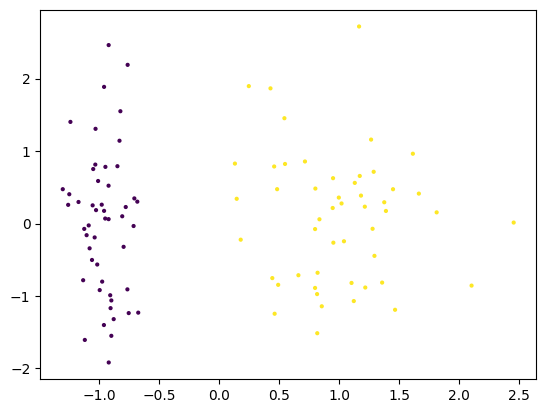

In [4]:
print_2d_result(X_data, y_data, w, b)